In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gerando três distribuições

In [2]:
x1 = np.random.normal(size=250)
x2 = np.random.normal(scale=2,size=250)
x3 = np.random.uniform(size=250,low=-2,high=2)
x4 = np.random.lognormal(sigma=0.8,size=250)

/home/alexsandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


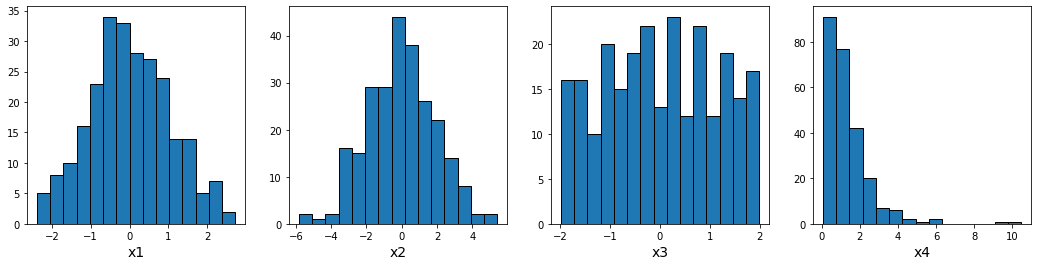

In [3]:
fig, axes = plt.subplots(ncols=4,figsize=(18,4))

for ax,label in zip(axes,['x1','x2','x3','x4']):
    ax.set_xlabel(label,fontsize=14)

axes[0].hist(x1,bins=15,edgecolor='black')
axes[1].hist(x2,bins=15,edgecolor='black')
axes[2].hist(x3,bins=15,edgecolor='black')
axes[3].hist(x4,bins=15,edgecolor='black')

fig.show()

## Medidas de localização

### <center> Média </center>

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

In [4]:
#Passando as variáveis para um array (matriz)
X = np.asarray([x1,x2,x3,x4])
X.shape

(4, 250)

In [5]:
#Calculando a média de x1
print(f'Valor médio de x1={np.mean(x1)}')

Valor médio de x1=0.0150986888686989


In [6]:
np.mean(X,axis=1)

array([ 0.01509869, -0.07191572,  0.02461913,  1.35862138])

In [7]:
#Ou utilizar a matriz X para computar a média de todas as variáveis
print(' '*8+'x1'+' '*9+'x2'+' '*9+'x3'+' '*9+'x4')
print(np.mean(X,axis=1))

        x1         x2         x3         x4
[ 0.01509869 -0.07191572  0.02461913  1.35862138]


---

### <center> Mediana </center>

$$mediana(\mathbf{x})=\left\{\begin{matrix}
\frac{1}{2} (x_{\frac{1}{2}}+x_{\frac{1}{2}+1}) \; \; \text{Se n for par}\\ 
\; \; \; \; \; \; \;  x_{\frac{1}{2}+1}   \; \; \; \; \; \; \; \; \; \; \;  \text{Se n for impar}
\end{matrix}\right. $$

In [8]:
#Ex1: [2,1,3,5,2,1,3,4]
l = np.asarray([2,1,3,5,2,1,3,4])
l

array([2, 1, 3, 5, 2, 1, 3, 4])

In [9]:
l.sort()
l

array([1, 1, 2, 2, 3, 3, 4, 5])

In [10]:
len(l) #O número de itens na lista é par

8

In [11]:
(l[int(len(l)/2)-1]+l[int(len(l)/2)])/2

2.5

In [12]:
np.median(l)

2.5

In [13]:
# Calculando as medianas das variáveis x1, x2, x3 e x4
np.median(X,axis=1)

array([-0.03812959, -0.14922422,  0.01679037,  1.04846693])

### <center> Quartil e percentis </center>

Os <b>quartis</b> são obtidos depois de ordenar o vetor em ordem crescente. São os três valores ordenados que dividem o dado em quatro partes iguais.

 <ul>
  <li>Primeiro quartil ($q_{1/4}$) - é o valor referente a última amostra ordenada nos primeiros 25% do dado (25º quartil)</li>
  <li>Segundo quartil ($q_{2/4}$) - é o valor referente a última amostra ordenada nos primeiros 50% do dado, ou a mediana (50º quartil)</li>
  <li>Terceiro quartil ($q_{3/4}$) - é o valor referente a última amostra ordenada nos primeiros 75% do dado</li>
  <li>Quarto quartil ($q_{4/4}$) - é o valor referente a última amostra ordenada nos primeiros 100% do dado</li>
</ul> 

<b>Percentis</b> são semelhantes ao quartis, porém neste caso divide-se o vetor ordenado em 100 partes.

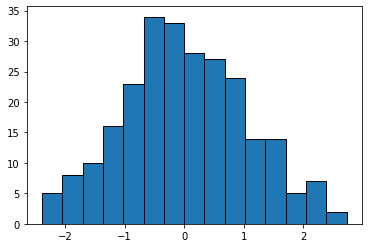

In [14]:
plt.hist(x1,bins=15,edgecolor='black')

plt.show()

In [15]:
#Obtendo quartil 25º
np.quantile(x1,q=0.25)

-0.6703826490097445

In [16]:
for i in np.arange(0.0,1.25,0.25):
    print(f'Quartil {int(i*100)}:  {np.quantile(x1,q=i)}')

Quartil 0:  -2.3857133278754086
Quartil 25:  -0.6703826490097445
Quartil 50:  -0.03812958597737835
Quartil 75:  0.7475507575305244
Quartil 100:  2.7261369677539387


In [17]:
#printando o percentis 10º, 20º, 30º, ..., 100º
for i in range(10,110,10):
    print(f'Percentil {i}:  {np.percentile(x1,q=i)}')

Percentil 10:  -1.2565842368560625
Percentil 20:  -0.8429212388488918
Percentil 30:  -0.5849023658468759
Percentil 40:  -0.30503522944720496
Percentil 50:  -0.03812958597737835
Percentil 60:  0.24879826320427287
Percentil 70:  0.5479843903272239
Percentil 80:  0.8519368475322752
Percentil 90:  1.436282063292394
Percentil 100:  2.7261369677539387


### <center> Boxplot </center>

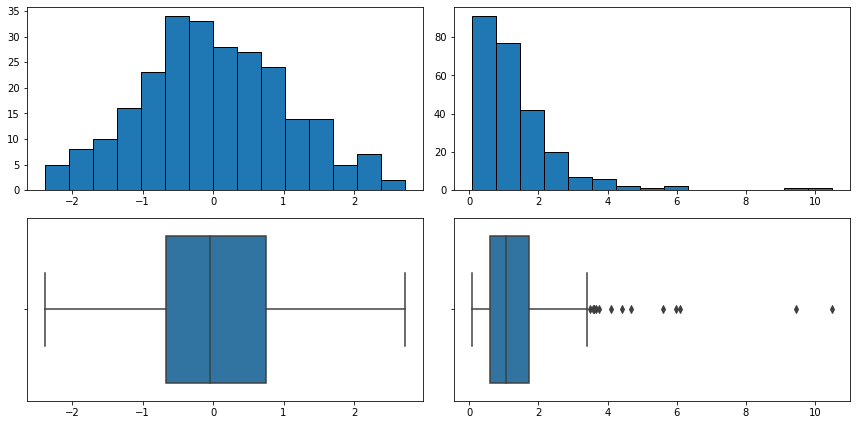

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

axes[0][0].hist(x1,bins=15,edgecolor='black')

axes[0][1].hist(x4,bins=15,edgecolor='black')

sns.boxplot(x1,ax=axes[1][0])

sns.boxplot(x4,ax=axes[1][1])

fig.tight_layout()

fig.savefig('Boxplot.png',dpi=300)

## <center> Média Truncada </center>

Você pode limitar o valor da média com base em algum valore estatísticos ou não-realistico (para geocientas, médidas que não correspondem a medidas físicas)

In [19]:
df = pd.DataFrame(X.T,columns=['x1','x2','x3','x4'])

In [20]:
df.head()

,x1,x2,x3,x4
0,-0.582545,-1.656391,1.250732,1.991453
1,2.257522,-0.842989,1.522328,2.747620
2,0.981905,-0.721088,-1.594571,2.249139
3,0.385322,1.293190,-1.063488,0.709273
4,0.747777,0.283362,1.208660,0.616130


In [21]:
df.x1.mean()

0.0150986888686989

trucando os valores de x1 entra o 2ºpercentil e o 98ºpercentil

In [22]:
df.x1[(df.x1 < df.x1.quantile(q=0.98))&
      (df.x1 > df.x1.quantile(q=0.02))].mean()

0.011321133541227909

## <center> Medidas de Dispersão e Distribuição </center>

As medidas definidas em torno da média de um conjunto de valores, são em sua maioria, denominadas uma medida de momento:

$$M(\mathbf{x})=\frac{\sum_{i=1}^n (x_i-\overline{x})^k}{(n-1)}$$

onde:

k=2 é o segundo momento central, chamado de variância;

k=3 é a obliquidade (<i>skweness</i>), ou terceiro momento central; e

k= 4 é a curtose (<i>kurtosis</i>), ou quarto momento central.


---

### Variância

A variância é a medida mais utilizada para valiar o grau de espalhamento de uma variável $\mathbf{x}$:

$$var = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2$$

e sua raiz quadrada é denominada desvio padrão ($\sigma$):

$$\sigma = \sqrt{var}$$

Vamos utilizar as distribuições x1 e x2, ambas gaussianas, para exemplificar.

In [23]:
print(3*'\t'+'x1'+ 3*'\t'+ 'x2')
print('Variância:'+'\t'+f'{df.x1.var()}'+'\t'+f'{df.x2.var()}')
print('Desvio Padrão:'+'\t'+f'{df.x1.std()}'+'\t'+f'{df.x2.std()}')

			x1			x2
Variância:	1.075180647077885	3.6828265830617117
Desvio Padrão:	1.0369091797635341	1.9190691970488485


/home/alexsandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


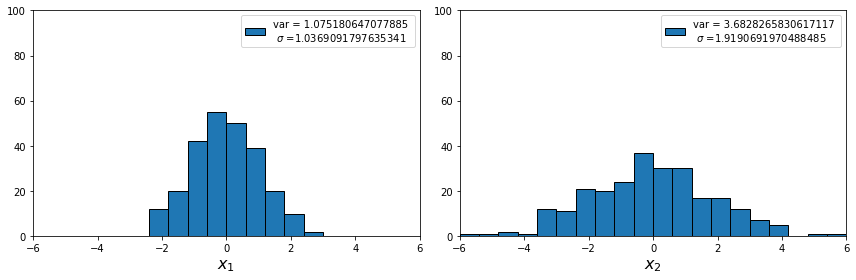

In [24]:
fig, axes = plt.subplots(ncols=2,figsize=(12,4))

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,100)

axes[0].hist(x1,bins=20,edgecolor='black',range=(-6,6),
             label=f'var = {df.x1.var()} \n $\sigma$ ={df.x1.std()}')
axes[0].set_xlabel('$x_1$',fontsize=16)
axes[0].legend()

axes[1].hist(x2,bins=20,edgecolor='black',range=(-6,6),
             label=f'var = {df.x2.var()} \n $\sigma$ ={df.x2.std()}')
axes[1].set_xlabel('$x_2$',fontsize=16)
axes[1].legend()

fig.tight_layout()

fig.savefig('variancia.png',dpi=200)
fig.show()



In [25]:
from scipy.stats import skew,kurtosis

### Obliquidade

A obliquidade, ou <i>skweness</i> em inglês, mede a simetria da distribuição dos dados em torno da média e é dada pelo terceiro momendo (quando $k=3$). Para tornar a medida independente de escala, é comum dividi-la pelo desvio padrão:

$$M(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n \frac{(x_i - \overline{x})^3}{\sigma^3}$$

In [26]:
#Criando uma distribuição assimétrica a direita
df['x5'] = (np.random.lognormal(mean=-2,sigma=0.7,size=250)*-1)+1

Para exemplificar, iremos utilizar as distribuições x1,x4 e x5

In [27]:
print(3*'\t'+'Obliquidade')
for i,j in zip(df.columns,skew(df)):
    print(i,j)

			Obliquidade
x1 0.10371471478638028
x2 0.024078464284865868
x3 0.0026992186540363713
x4 3.3461785144986966
x5 -2.2722852575704486


/home/alexsandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


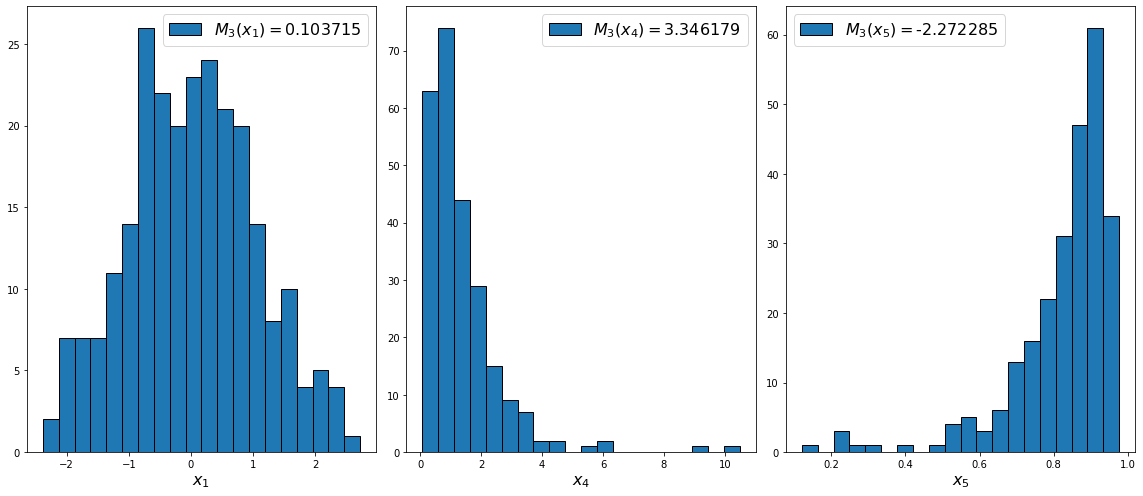

In [28]:
fig,axes = plt.subplots(ncols=3,figsize=(16,7))

axes[0].hist(x1,bins=20,edgecolor='black',
             label=f'$M_3(x_1)=${skew(df.x1):f}')
axes[0].set_xlabel('$x_1$',fontsize=16)

axes[1].hist(x4,bins=20,edgecolor='black',
             label=f'$M_3(x_4)=${skew(df.x4):f}')
axes[1].set_xlabel('$x_4$',fontsize=16)

axes[2].hist(df.x5,bins=20,edgecolor='black',
             label=f'$M_3(x_5)=${skew(df.x5):f}')
axes[2].set_xlabel('$x_5$',fontsize=16)

for ax in axes:
    ax.legend(fontsize=16)

fig.tight_layout()

fig.savefig('obliquidade.png',dpi=250)

fig.show()

### Curtose

A curtose, ou <i>kurtosis</i> em inglês, mede a simetria da distribuição dos dados em torno da média e é dada pelo quarto momento (quando $k=4$). ela verifica se a distribuição apresenta um pico, ou se a distribuição está "achatada":

$$M(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n \frac{(x_i - \overline{x})^4}{\sigma^4}$$

Para exemplificar, iremos utilizar as distribuições x1,x2 e x3

In [29]:
print(3*'\t'+'Curtose')
for i,j in zip(df.columns[:3],kurtosis(df[df.columns[:3]])):
    print(i,j)

			Curtose
x1 -0.34753125911219973
x2 -0.0273482191380916
x3 -1.1127758137770527


In [39]:
x_n = np.concatenate((x1,np.random.normal(scale=0.05,size=100)))

/home/alexsandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


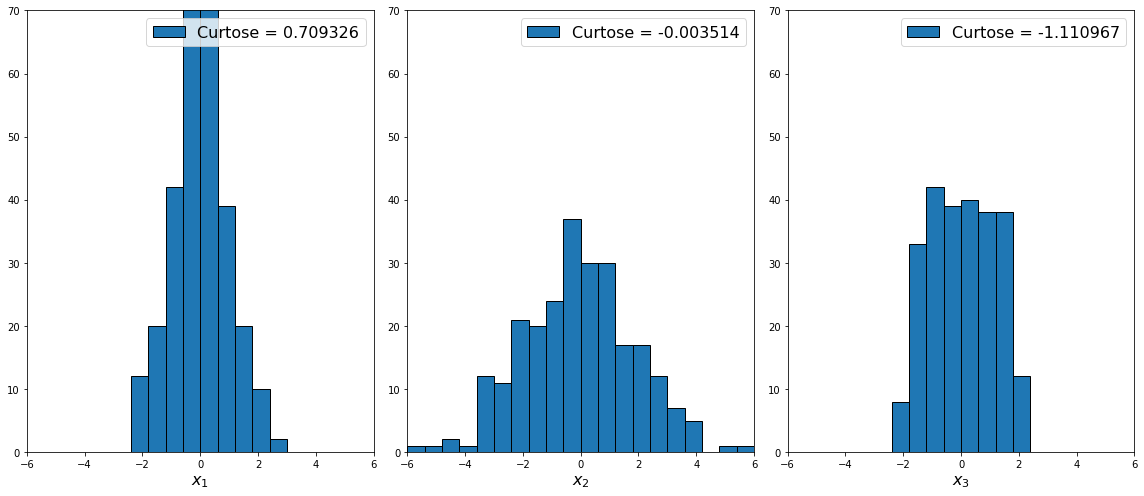

In [40]:
fig, axes = plt.subplots(ncols=3,figsize=(16,7))

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,70)

axes[0].hist(x_n,bins=20,edgecolor='black',range=(-6,6),
             label=f'Curtose = {kurtosis(x_n):f}')
axes[0].set_xlabel('$x_1$',fontsize=16)

axes[1].hist(x2,bins=20,edgecolor='black',range=(-6,6),
             label=f'Curtose = {df.x2.kurtosis():f}')
axes[1].set_xlabel('$x_2$',fontsize=16)

axes[2].hist(x3,bins=20,edgecolor='black',range=(-6,6),
             label=f'Curtose = {df.x3.kurtosis():f}')
axes[2].set_xlabel('$x_3$',fontsize=16)

for ax in axes:
    ax.legend(fontsize=16)

fig.tight_layout()

fig.savefig('curtose.png',dpi=250)
fig.show()
